In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import pandas as pd



In [4]:
red = pd.read_csv('winequality/winequality-red.csv', sep = None)
white = pd.read_csv('winequality/winequality-white.csv', sep = None)
print ("red wine",red.shape)
print ("white wine",white.shape)

red wine (1599, 12)
white wine (4898, 12)


D:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [32]:


name = ['fixed acidity',
'volatile acidity',          
'citric acid',               
'residual sugar',          
'chlorides',              
'free sulfur dioxide',     
'total sulfur dioxide' ,  
'density'              ,     
'pH'                   ,    
'sulphates'            ,     
'alcohol'              ,    
'quality'              ,  ]

for i in range (0,12):
     print(str(name[i]) + " : mean = " + str(round(red.mean()[i],2)) + " variance = " + str(round(red.var()[i],2)) + " max = " + str(round(red.max()[i],2))+ " min = " +str(round(red.min()[i],2))
          + "                         mean = " + str(round(white.mean()[i],2)) + " variance = " + str(round(white.var()[i],2)) + " max = " + str(round(white.max()[i],2))+ " min = " +str(round(white.min()[i],2))
          )
    




fixed acidity : mean = 8.32 variance = 3.03 max = 15.9 min = 4.6                         mean = 6.85 variance = 0.71 max = 14.2 min = 3.8
volatile acidity : mean = 0.53 variance = 0.03 max = 1.58 min = 0.12                         mean = 0.28 variance = 0.01 max = 1.1 min = 0.08
citric acid : mean = 0.27 variance = 0.04 max = 1.0 min = 0.0                         mean = 0.33 variance = 0.01 max = 1.66 min = 0.0
residual sugar : mean = 2.54 variance = 1.99 max = 15.5 min = 0.9                         mean = 6.39 variance = 25.73 max = 65.8 min = 0.6
chlorides : mean = 0.09 variance = 0.0 max = 0.61 min = 0.01                         mean = 0.05 variance = 0.0 max = 0.35 min = 0.01
free sulfur dioxide : mean = 15.87 variance = 109.41 max = 72.0 min = 1.0                         mean = 35.31 variance = 289.24 max = 289.0 min = 2.0
total sulfur dioxide : mean = 46.47 variance = 1082.1 max = 289.0 min = 6.0                         mean = 138.36 variance = 1806.09 max = 440.0 min = 9.0
densi

1599
1599
(1119, 11) (1119,) (480, 11) (480,)


{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': None, 'min_samples_split': [2, 5, 10, 60], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [59]:
white.head()
white.drop(['free sulfur dioxide','pH','residual sugar'],axis=1)
X = red.iloc[:,:-1].values
print(len(X))


y = red.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,100,200,600,1000,2000]
acc = []
acc1 = []
for i in k:
    base_model = RandomForestRegressor(n_estimators = i, random_state = 42)
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test,y_test)
    base_accuracy1 = evaluate(base_model, X_train,y_train)
    
    
    acc1.append(base_accuracy1)
    acc.append(base_accuracy)

    



Model Performance
Average Error: 0.5729 degrees.
Accuracy = 89.43%.
Model Performance
Average Error: 0.1948 degrees.
Accuracy = 96.39%.
Model Performance
Average Error: 0.4917 degrees.
Accuracy = 90.93%.
Model Performance
Average Error: 0.1801 degrees.
Accuracy = 96.68%.
Model Performance
Average Error: 0.4806 degrees.
Accuracy = 91.11%.
Model Performance
Average Error: 0.1772 degrees.
Accuracy = 96.77%.
Model Performance
Average Error: 0.4771 degrees.
Accuracy = 91.24%.
Model Performance
Average Error: 0.1763 degrees.
Accuracy = 96.80%.
Model Performance
Average Error: 0.4600 degrees.
Accuracy = 91.54%.
Model Performance
Average Error: 0.1755 degrees.
Accuracy = 96.78%.
Model Performance
Average Error: 0.4573 degrees.
Accuracy = 91.56%.
Model Performance
Average Error: 0.1738 degrees.
Accuracy = 96.81%.
Model Performance
Average Error: 0.4565 degrees.
Accuracy = 91.55%.
Model Performance
Average Error: 0.1720 degrees.
Accuracy = 96.84%.
Model Performance
Average Error: 0.4622 degrees.

[90.35662995356873, 90.88442122880899, 91.22044955548357, 91.4743210776374, 91.60009178274484, 91.65559874743548, 91.70718604902278, 91.66032960803369, 91.63792007102664, 91.70906219630709, 91.93144368858654, 91.96756649749847, 91.99313586545729, 92.00703865673253, 92.01612316884426, 92.02627416045783, 92.03341533041788, 92.03863351689883, 92.03755075045892, 92.0658247399489, 92.04854375877335, 92.04705828204298]


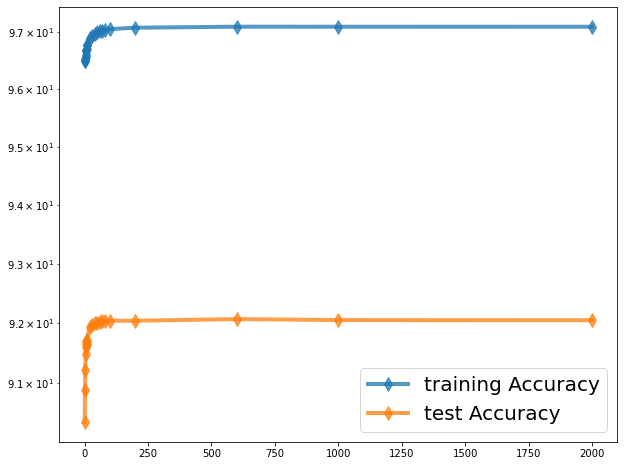

In [63]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))



ax.semilogy(k, acc1, lw=4, marker='d', markersize=10, alpha=0.75,label='training Accuracy')
ax.semilogy(k, acc, lw=4, marker='d', markersize=10, alpha=0.75,label='test Accuracy')
print(acc)



ax.legend(fontsize=20,loc=0)
plt.show()

In [65]:

white.drop(['sulphates','free sulfur dioxide','citric acid'],axis=1)
X = white.iloc[:,:-1].values
print(len(X))


y = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,100,200,600,1000,2000]
acc2 = []
acc3 = []
for i in k:
    base_model = RandomForestRegressor(n_estimators = i, random_state = 42)
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test,y_test)
    base_accuracy1 = evaluate(base_model, X_train,y_train)
    
    
    acc2.append(base_accuracy1)
    acc3.append(base_accuracy)

    


4898
4898
(3428, 11) (3428,) (1470, 11) (1470,)
Model Performance
Average Error: 0.5401 degrees.
Accuracy = 90.36%.
Model Performance
Average Error: 0.1957 degrees.
Accuracy = 96.53%.
Model Performance
Average Error: 0.5078 degrees.
Accuracy = 90.88%.
Model Performance
Average Error: 0.1972 degrees.
Accuracy = 96.50%.
Model Performance
Average Error: 0.4891 degrees.
Accuracy = 91.22%.
Model Performance
Average Error: 0.1972 degrees.
Accuracy = 96.49%.
Model Performance
Average Error: 0.4777 degrees.
Accuracy = 91.47%.
Model Performance
Average Error: 0.1936 degrees.
Accuracy = 96.56%.
Model Performance
Average Error: 0.4707 degrees.
Accuracy = 91.60%.
Model Performance
Average Error: 0.1910 degrees.
Accuracy = 96.61%.
Model Performance
Average Error: 0.4685 degrees.
Accuracy = 91.66%.
Model Performance
Average Error: 0.1881 degrees.
Accuracy = 96.67%.
Model Performance
Average Error: 0.4648 degrees.
Accuracy = 91.71%.
Model Performance
Average Error: 0.1867 degrees.
Accuracy = 96.68%.


[90.35662995356873, 90.88442122880899, 91.22044955548357, 91.4743210776374, 91.60009178274484, 91.65559874743548, 91.70718604902278, 91.66032960803369, 91.63792007102664, 91.70906219630709, 91.93144368858654, 91.96756649749847, 91.99313586545729, 92.00703865673253, 92.01612316884426, 92.02627416045783, 92.03341533041788, 92.03863351689883, 92.03755075045892, 92.0658247399489, 92.04854375877335, 92.04705828204298]


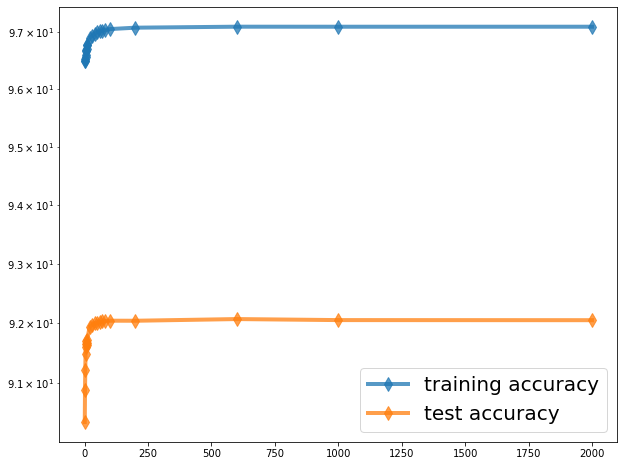

In [67]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))



ax.semilogy(k, acc2, lw=4, marker='d', markersize=10, alpha=0.75,label='training accuracy')
ax.semilogy(k, acc3, lw=4, marker='d', markersize=10, alpha=0.75,label='test accuracy')

print(acc3)

ax.legend(fontsize=20,loc=0)
plt.show()

In [87]:
print(acc)

[89.42857142857143, 90.93266369047619, 91.11168981481481, 91.23803323412699, 91.54345238095237, 91.55844907407408, 91.5547052154195, 91.42506820436508, 91.53648589065256, 91.52299107142858, 91.67922867063493, 91.71996527777777, 91.74869171626985, 91.72506448412699, 91.78933118386243, 91.8047867063492, 91.82936817956349, 91.88276537698412, 91.88379092261904, 91.92367022156084, 91.92271726190476, 91.93071887400794]


In [7]:
# Importing the neccesary libraries we are going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:

reg = LogisticRegression( tol=0.0001) 
reg.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_hat = reg.predict(X_test)

In [37]:
acc = metrics.accuracy_score(y_hat,y_test)
acc

0.5645833333333333

In [38]:
white.head()

X = white.iloc[:,:-1].values
print(len(X))


y = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

4898
4898
(3428, 11) (3428,) (1470, 11) (1470,)


In [39]:

reg = LogisticRegression( tol=0.0001) 
reg.fit(X_train,y_train)
y_hat = reg.predict(X_test)
acc = metrics.accuracy_score(y_hat,y_test)
acc

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5319727891156463

In [42]:
red.head()

X = red.iloc[:,:-1].values
print(len(X))


y = red.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1]
acc = []
acc1 = []
for i in k:
    base_model = RandomForestRegressor(n_estimators = i)
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test,y_test)
    base_accuracy1 = evaluate(base_model, X_train,y_train)
    
    
    acc1.append(base_accuracy1)
    acc.append(base_accuracy)
    
print(acc)


1599
1599
(1119, 11) (1119,) (480, 11) (480,)
Model Performance
Average Error: 0.5479 degrees.
Accuracy = 89.87%.
Model Performance
Average Error: 0.1850 degrees.
Accuracy = 96.64%.
[89.86904761904762]


In [43]:
white.head()

X = white.iloc[:,:-1].values
print(len(X))


y = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1]
acc = []
acc1 = []
for i in k:
    base_model = RandomForestRegressor(n_estimators = i)
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test,y_test)
    base_accuracy1 = evaluate(base_model, X_train,y_train)
    
    
    acc1.append(base_accuracy1)
    acc.append(base_accuracy)
    
print(acc)


4898
4898
(3428, 11) (3428,) (1470, 11) (1470,)
Model Performance
Average Error: 0.6054 degrees.
Accuracy = 89.40%.
Model Performance
Average Error: 0.2074 degrees.
Accuracy = 96.36%.
[89.4007666558687]


In [69]:

white.head()
white.drop(['sulphates','free sulfur dioxide','citric acid'],axis=1)
X = white.iloc[:,:-1].values
print(len(X))


y = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_trainw,X_testw,y_trainw,y_testw = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)





red.head()
red.drop(['free sulfur dioxide','pH','residual sugar'],axis=1)
X = red.iloc[:,:-1].values
print(len(X))


y = red.iloc[:,-1].values
print(len(y))



X, y = shuffle(X, y,random_state = 42)
X_trainr,X_testr,y_trainr,y_testr = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)



    
    
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1,5,6,10,20,30,50,70,100,200]
accwhite = []
accred = []

errCrossw = np.zeros(10)
errCrossr = np.zeros(10)

for e,i in enumerate(k):
    base_modelw = RandomForestRegressor(n_estimators = i)
    base_modelw.fit(X_trainw, y_trainw)
    base_accuracy = evaluate(base_modelw, X_testw,y_testw)
    
    



    
    base_modelr = RandomForestRegressor(n_estimators = i)
    base_modelr.fit(X_trainr, y_trainr)
    base_accuracy = evaluate(base_modelr, X_testr,y_testr)
    
    






    

    nFolds = 5;
    J = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X_trainw,y_trainw,nFolds,iFold) # use ith block as validation
        
        base_modelw = RandomForestRegressor(n_estimators = i)
        base_modelw.fit(Xti, Yti)
        J[iFold] =  evaluate(base_modelw, Xvi,Yvi)

    errCrossw[e] = np.mean(J)
    
    J = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X_trainr,y_trainr,nFolds,iFold) # use ith block as validation
        
        base_modelw = RandomForestRegressor(n_estimators = i)
        base_modelw.fit(Xti, Yti)
        J[iFold] =  evaluate(base_modelw, Xvi,Yvi)

    errCrossr[e] = np.mean(J)
    
    




4898
4898
(3428, 11) (3428,) (1470, 11) (1470,)
1599
1599
(3428, 11) (3428,) (1470, 11) (1470,)
Model Performance
Average Error: 0.5776 degrees.
Accuracy = 89.73%.
Model Performance
Average Error: 0.5062 degrees.
Accuracy = 90.62%.
Model Performance
Average Error: 0.6327 degrees.
Accuracy = 89.03%.
Model Performance
Average Error: 0.6058 degrees.
Accuracy = 89.00%.
Model Performance
Average Error: 0.5394 degrees.
Accuracy = 90.28%.
Model Performance
Average Error: 0.5869 degrees.
Accuracy = 89.91%.
Model Performance
Average Error: 0.6327 degrees.
Accuracy = 88.90%.
Model Performance
Average Error: 0.5580 degrees.
Accuracy = 89.71%.
Model Performance
Average Error: 0.5000 degrees.
Accuracy = 90.61%.
Model Performance
Average Error: 0.4439 degrees.
Accuracy = 91.82%.
Model Performance
Average Error: 0.5804 degrees.
Accuracy = 89.62%.
Model Performance
Average Error: 0.4777 degrees.
Accuracy = 91.35%.
Model Performance
Average Error: 0.4895 degrees.
Accuracy = 91.31%.
Model Performance
Av

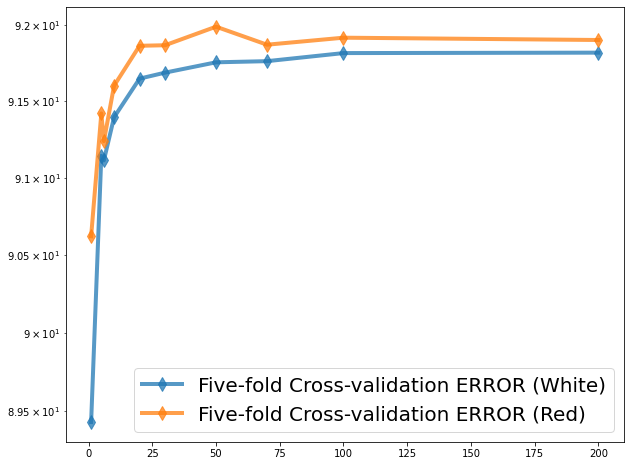

In [70]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))




ax.semilogy(k, errCrossw, lw=4, marker='d', markersize=10, alpha=0.75,label='Five-fold Cross-validation ERROR (White)')
ax.semilogy(k, errCrossr, lw=4, marker='d', markersize=10, alpha=0.75,label='Five-fold Cross-validation ERROR (Red)')




ax.legend(fontsize=20,loc=0)
plt.show()


In [84]:

white.head()
white.drop(['sulphates','free sulfur dioxide','citric acid'],axis=1)
Xw = white.iloc[:,:-1].values
print(len(X))


yw = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
Xw = sc.fit_transform(Xw)
import seaborn as sns



Xw, yw = shuffle(X, y,random_state = 42)
X_trainw,X_testw,y_trainw,y_testw = train_test_split(Xw, yw, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)





red.head()
red.drop(['free sulfur dioxide','pH','residual sugar'],axis=1)
Xr = red.iloc[:,:-1].values
print(len(Xr))


yr = red.iloc[:,-1].values
print(len(y))



Xr, yr = shuffle(Xr, yr,random_state = 42)
X_trainr,X_testr,y_trainr,y_testr = train_test_split(Xr, yr, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)



    
    


k = [10,20,25,30,35,40,45,50] 

accwhite = []
accred = []

errCrossw = np.zeros(8)
errCrossr = np.zeros(8)


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


    
print(accuracy)        


for i,b in enumerate(k):

    


    nFolds = 5;
    J = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X_trainw,y_trainw,nFolds,iFold) # use ith block as validation
        
        model = MLPClassifier(hidden_layer_sizes=(b,150), max_iter=1000)
        model.fit(Xw, yw)
        predicted_class=model.predict(Xti)
        accuracy = accuracy_score(Yti,predicted_class)

    
        
        J[iFold] =  accuracy

    errCrossw[i] = np.mean(J)
    
    J = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X_trainr,y_trainr,nFolds,iFold) # use ith block as validation
        
            
    
        model = MLPClassifier(hidden_layer_sizes=(b,150), max_iter=1000)
        model.fit(Xr, yr)
        predicted_class=model.predict(Xti)
        accuracy = accuracy_score(Yti,predicted_class)

    
        
    
        
        J[iFold] =  accuracy

    errCrossr[i] = np.mean(J)
    
    



1599
1599
(3428, 11) (3428,) (1470, 11) (1470,)
1599
1599
(3428, 11) (3428,) (1470, 11) (1470,)
0.6167597765363129


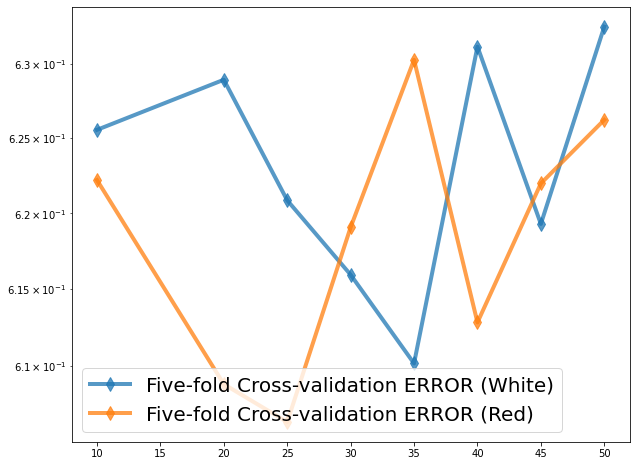

In [85]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))




ax.semilogy(k, errCrossw, lw=4, marker='d', markersize=10, alpha=0.75,label='Five-fold Cross-validation ERROR (White)')
ax.semilogy(k, errCrossr, lw=4, marker='d', markersize=10, alpha=0.75,label='Five-fold Cross-validation ERROR (Red)')




ax.legend(fontsize=20,loc=0)
plt.show()

























